<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/Linear_Regression_with_Average_Yearly_NYC_Temperatures_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path = "/content/drive/My Drive/ml_data/ave_yearly_temp_nyc_1895-2017.csv"

nyc = pd.read_csv(file_path)
nyc.head()

,Date,Value,Anomaly
0,189512,52.1,-1.8
1,189612,52.3,-1.6
2,189712,52.3,-1.6
3,189812,53.8,-0.1
4,189912,52.7,-1.2


In [8]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(5)

,Date,Temperature,Anomaly
0,18,52.1,-1.8
1,18,52.3,-1.6
2,18,52.3,-1.6
3,18,53.8,-0.1
4,18,52.7,-1.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

In [11]:
X_train.shape

(92, 1)

In [12]:
X_test.shape

(31, 1)

In [13]:
y_train.shape

(92,)

In [14]:
y_test.shape

(31,)

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [17]:
linear_regression.coef_

array([2.00056998])

In [18]:
linear_regression.intercept_

np.float64(15.657568081063957)

In [21]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
  print(f'Predicted: {p:.2f}, expected: {e:.2f}')

Predicted: 53.67, expected: 52.40
Predicted: 53.67, expected: 53.70
Predicted: 53.67, expected: 51.40
Predicted: 53.67, expected: 53.90
Predicted: 55.67, expected: 55.40
Predicted: 53.67, expected: 54.90
Predicted: 53.67, expected: 54.60


In [27]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(22)

array([59.67010766])

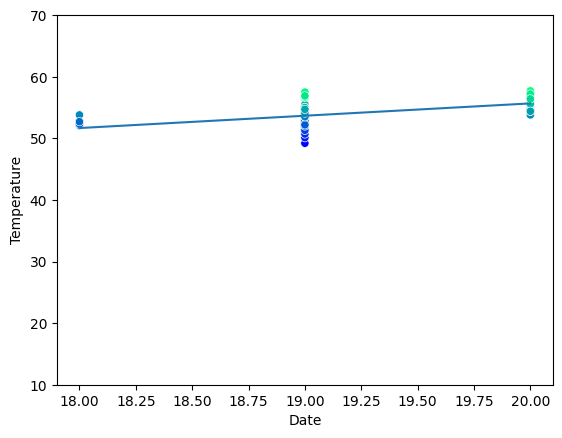

In [34]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature',palette='winter',legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)
line = plt.plot(x,y)